# Анализ маркетинговых показателей Procrastinate Pro+

**Описание проекта**

В данном проекте предствлен анализ бизнес-показателей развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. **Цель проекта** — разобраться в причинах и помочь компании выйти в плюс.

**Основные задачи -**
изучить:
- откуда приходят пользователи и какими устройствами они пользуются;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов.

**Описание исходных данных**

В нашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

**План работы:**
1. **Загрузить данные и подготовить их к анализу.**


2. **Задать функции для расчета и анализа LTV, ROI, удержания и конверсии.**


3. **Провести исследовательский анализ данных:**
    - Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
    - Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
    - Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
    - Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
    
    
4. **Провести маркетинговый анализ:**
    - Посчитать общую сумму расходов на маркетинг.
    - Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
    - Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
    - Узнайть, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
    
    
5. **Оценить окупаемость рекламы:**
    - Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
    - Проверить конверсию пользователей и динамику её изменения. То же самое сделайть с удержанием пользователей. Построить и изучите графики конверсии и удержания.
    - Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
    - Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
    - Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
    

6. **Сформулировать выводы и рекомендации отделу маркетинга.**

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [3]:
orders = pd.read_csv('/datasets/orders_info_short.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [4]:
costs = pd.read_csv('/datasets/costs_info_short.csv')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Во всех трех датасетах столбцы, хранящие дату, имеют некорректный тип данных. 
Также стоит привести названия столбцов в таблицах к единообразному, правильному виду.

In [5]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = ['dt', 'channel', 'costs']

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [7]:
visits.duplicated().sum()

0

In [8]:
orders.duplicated().sum()

0

In [9]:
costs.duplicated().sum()

0

Как видно, явных дубликатов в датасетах нет.

**Промежуточный вывод:** во всех исходных датафреймах формат столбцов, хранящих даты, был указан неверно. В процессе подготовки данных все форматы были скорректированы и преведены в порядок, как и названия столбцов в датафреймах. 

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [10]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())



    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [11]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [12]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [14]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [15]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [18]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [19]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

In [20]:
min_date

datetime.date(2019, 5, 1)

In [21]:
max_date

datetime.date(2019, 10, 27)

Минимальная дата привлечения пользователей - 1 мая 2019, а максимальная - 27 октября 2019.

In [22]:
regions = profiles.groupby('region').agg({'user_id':'nunique', 'payer':'mean'})
regions.columns = ['users_count', 'paying_ratio']
regions.sort_values(by='paying_ratio', ascending=False)

,users_count,paying_ratio
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


Больше всего пользователей - из США (около 100 тысяч), эта же страна лидирует по доле платящих пользователей (около 7%). 

In [23]:
devices = profiles.groupby('device').agg({'user_id':'nunique', 'payer':'mean'})
devices.columns = ['users_count', 'paying_ratio']
devices.sort_values(by='paying_ratio', ascending=False)

,users_count,paying_ratio
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


Больше всего пользователей используют iPhone, а доля платящих выше всего для Mac. Ниже всего доля платящих для других ПК.

In [24]:
channels = profiles.groupby('channel').agg({'user_id':'nunique', 'payer':'mean'})
channels.columns = ['users_count', 'paying_ratio']
channels.sort_values(by='paying_ratio', ascending=False)

,users_count,paying_ratio
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


Доля платящих пользователей выше всего для канала FaceBoom (12,2%), а меньше всего - для OppleCreativeMedia. Среди organic-пользователей платящих 2%. 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [25]:
costs['costs'].sum()

105497.30000000002

Суммарные расходы на рекламу составили 105497 денежных единиц.

In [26]:
t1 = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)

In [27]:
t1['perc'] = (t1['costs'] / t1['costs'].sum())
t1.style.format({'perc': '{:,.2%}'.format})

,costs,perc
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


Тройка лидеров по рекламным вложениям - TipTop, FaceBoom и WahooNetBanner. В процентном соотношении - 51,9%, 30,7%, 4,88% соответственно, то есть, TipTop и FaceBoom забирают больше 80% рекламного бюджета.

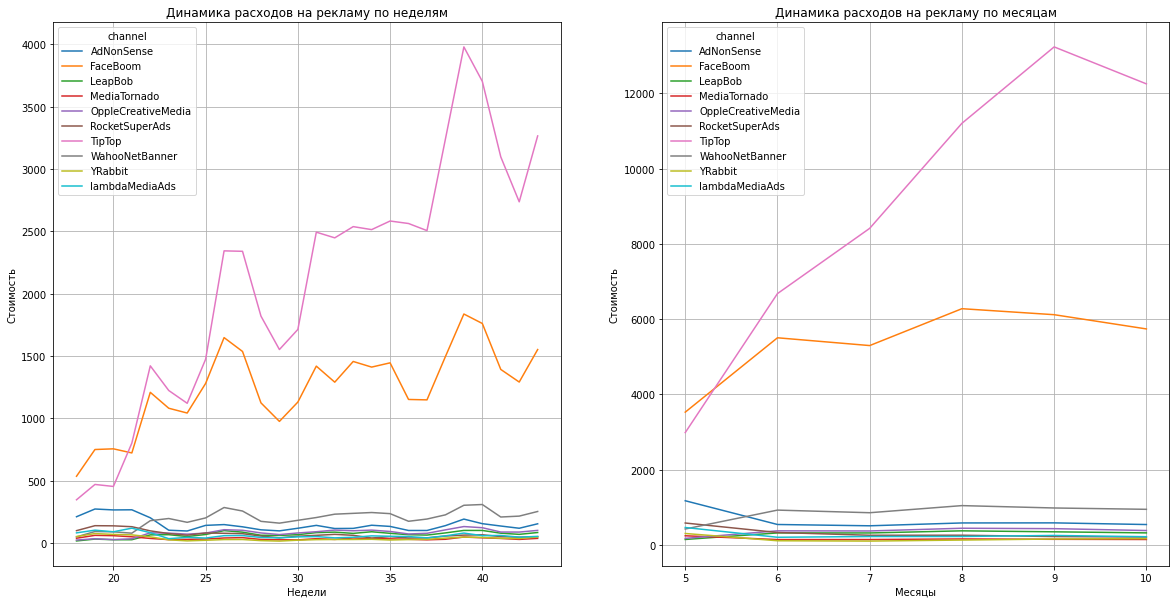

In [28]:
t = costs
t['dt'] = pd.to_datetime(t['dt'])
t['week'] = t.dt.dt.isocalendar().week
t['month'] = t.dt.dt.month
 
plt.figure(figsize=(20, 10))

t.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, ax=plt.subplot(1,2,1))
plt.title('Динамика расходов на рекламу по неделям')
plt.xlabel('Недели')
plt.ylabel('Стоимость')
t.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, ax=plt.subplot(1,2,2))
plt.title('Динамика расходов на рекламу по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Стоимость')
plt.show;

На графиках выше представлена динамика изменения рекламных расходов по разным источникам по неделям и месяцам. Среди прочих каналов также выделяются TipTop и FaceBoom.

Посчитаем CAC.

In [29]:
profiles = profiles.query('channel != "organic"')

In [30]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Самые дорогие пользователи пришли с каналов TipTop, FaceBoom и AdNonSense. Стоимость одного пользователя для канала TipTop невероятно высока относительно остальных каналов!

In [31]:
profiles['acquisition_cost'].sum() / profiles['acquisition_cost'].count()

1.1274813239427588

Средний CAC по всем каналам - 1,12.

**Промежуточный вывод:** суммарные расходы на рекламу составили 105497 денежных единиц, тройка лидеров по рекламным вложениям - TipTop, FaceBoom и WahooNetBanner. 

В процентном соотношении - 51,9%, 30,7%, 4,88% соответственно, то есть, TipTop и FaceBoom забирают больше 80% рекламного бюджета. 

Средний CAC по всем каналам - 1,12. Среднее значение CAC превышает только CAC канала TipTop.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [32]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
analysis_horizon = 14  # горизонт анализа

In [33]:
ltv_raw, ltv, ltv_history, roi, roi_history =  get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=[])

In [34]:
ltv

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.34558,0.435754,0.504507,0.56109,0.611436,0.654368,0.69414,0.729778,0.764619,0.796665,0.826152,0.85207,0.878116,0.90203


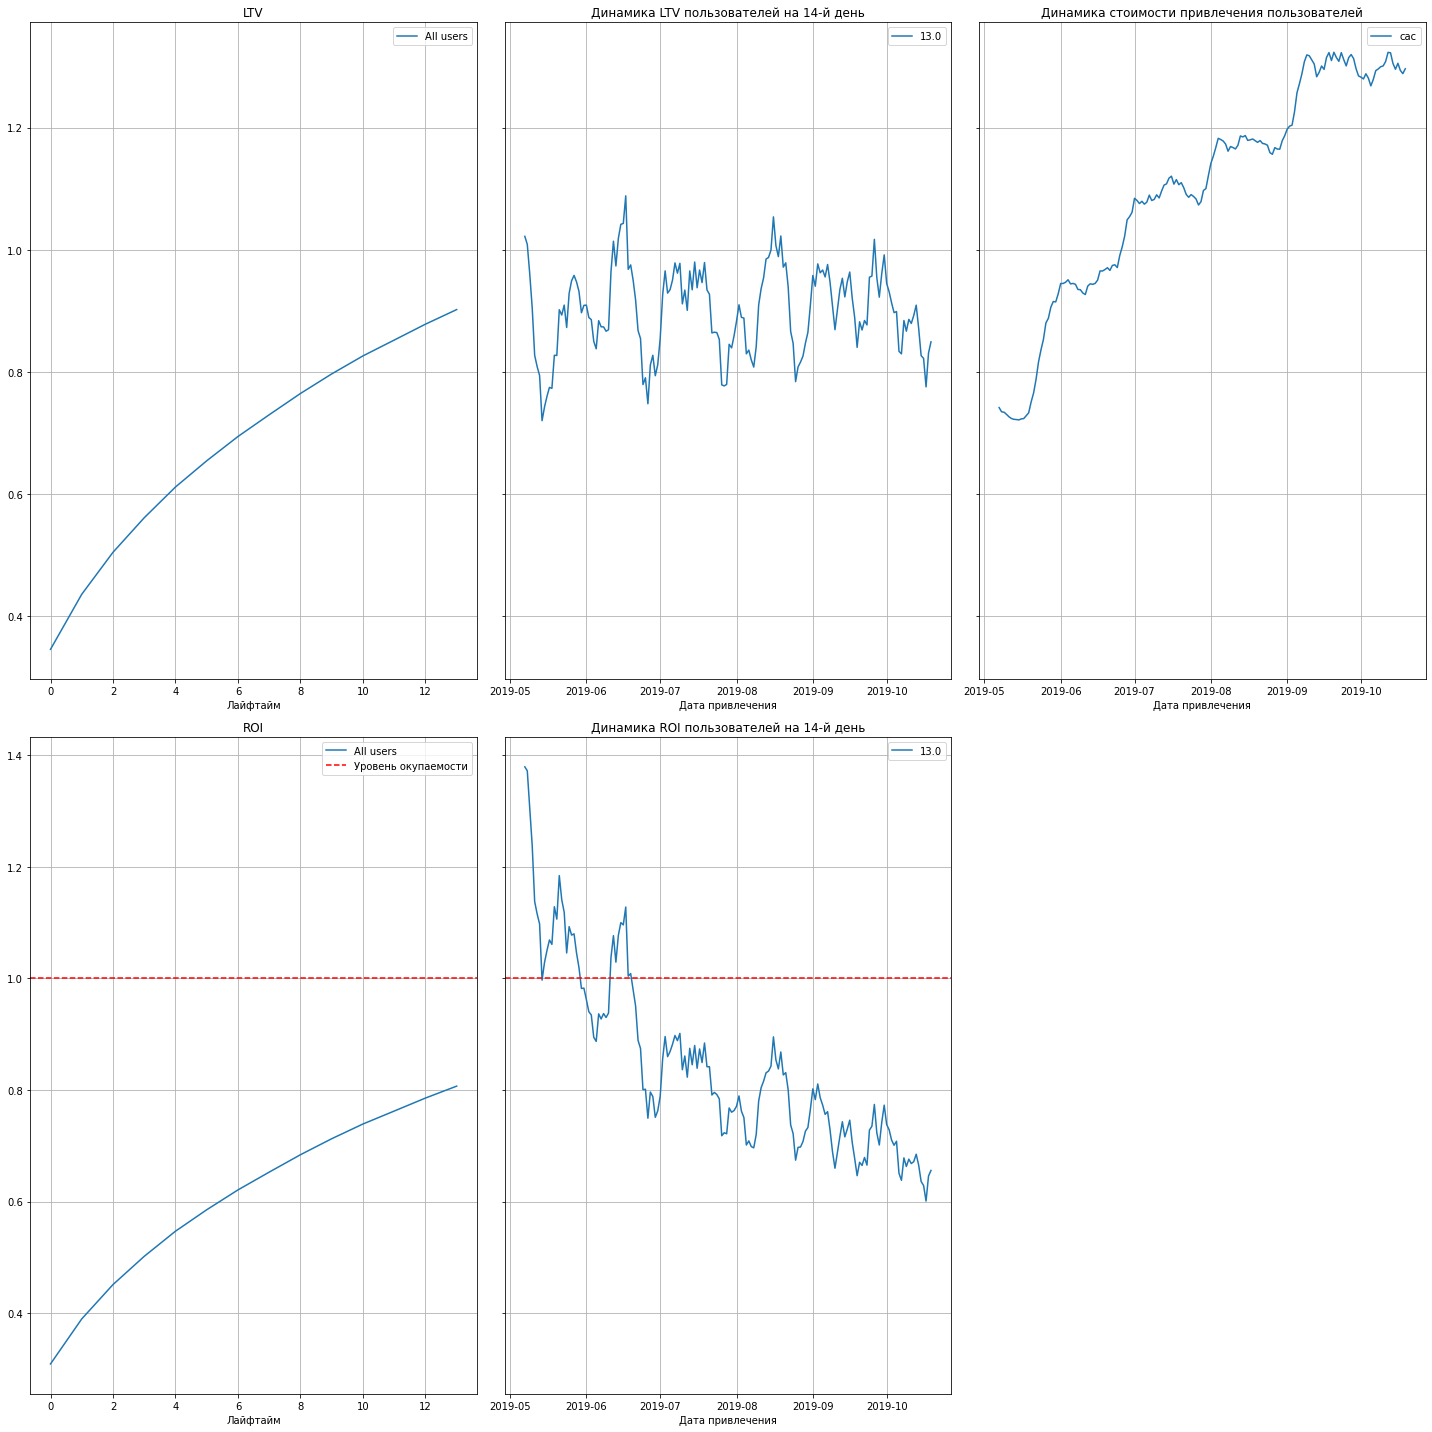

In [35]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=7)

Судя по общему ROI, реклама в целом не окупается! Наблюдается тенденция понижения ROI и повышения CAC. Судя по LTV, в динамике пожизненная ценность пользователя не растет.

In [36]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date, analysis_horizon)
conversion

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.058752,0.066321,0.069999,0.072571,0.0745,0.075775,0.076745,0.077591,0.078291,0.078945,0.079362,0.079678,0.079904,0.080197


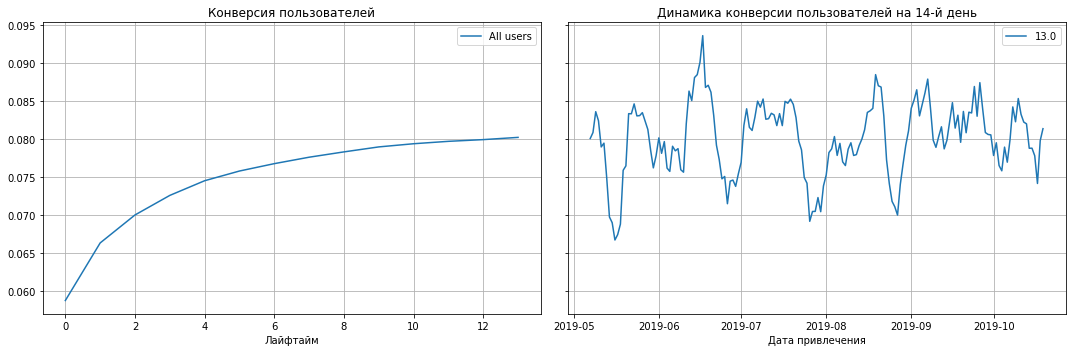

In [37]:
plot_conversion(conversion, conversion_history, analysis_horizon, window=7)

In [38]:
retention_raw, retention, retention_history = get_retention(profiles, visits, observation_date, analysis_horizon)

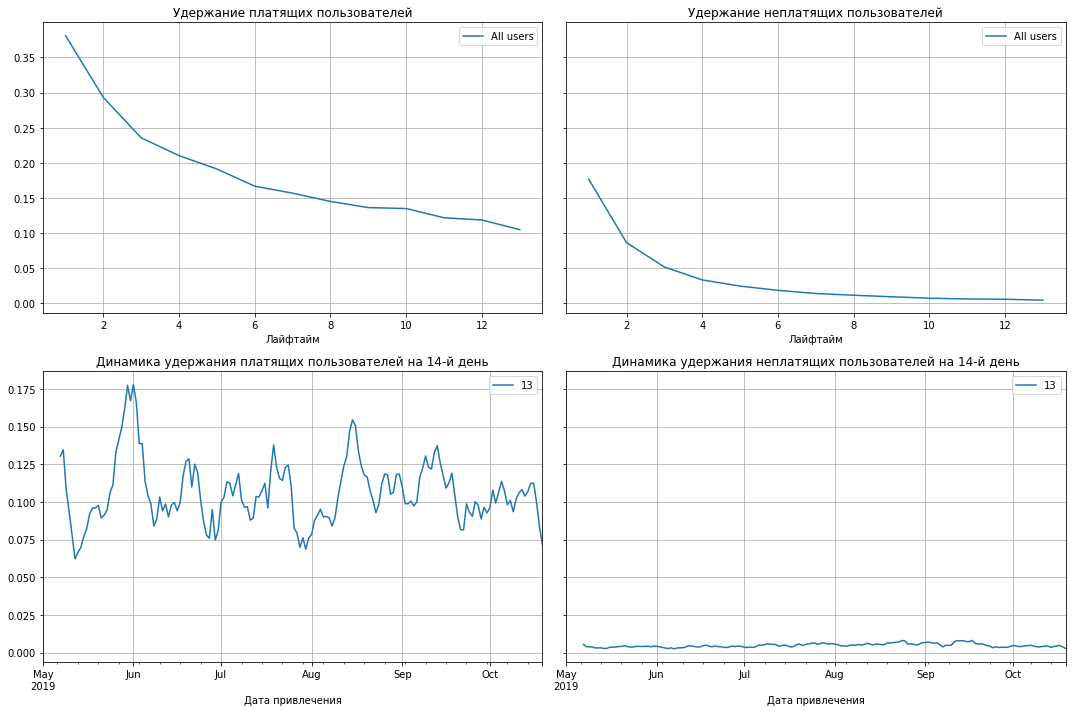

In [39]:
plot_retention(retention, retention_history, analysis_horizon, window=7)

Судя по графикам, в динамике удержание платящих пользователей падает.

#### Показатели с разбивкой по устройствам

In [40]:
ltv_raw, ltv, ltv_history, roi, roi_history =  get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=['device'])

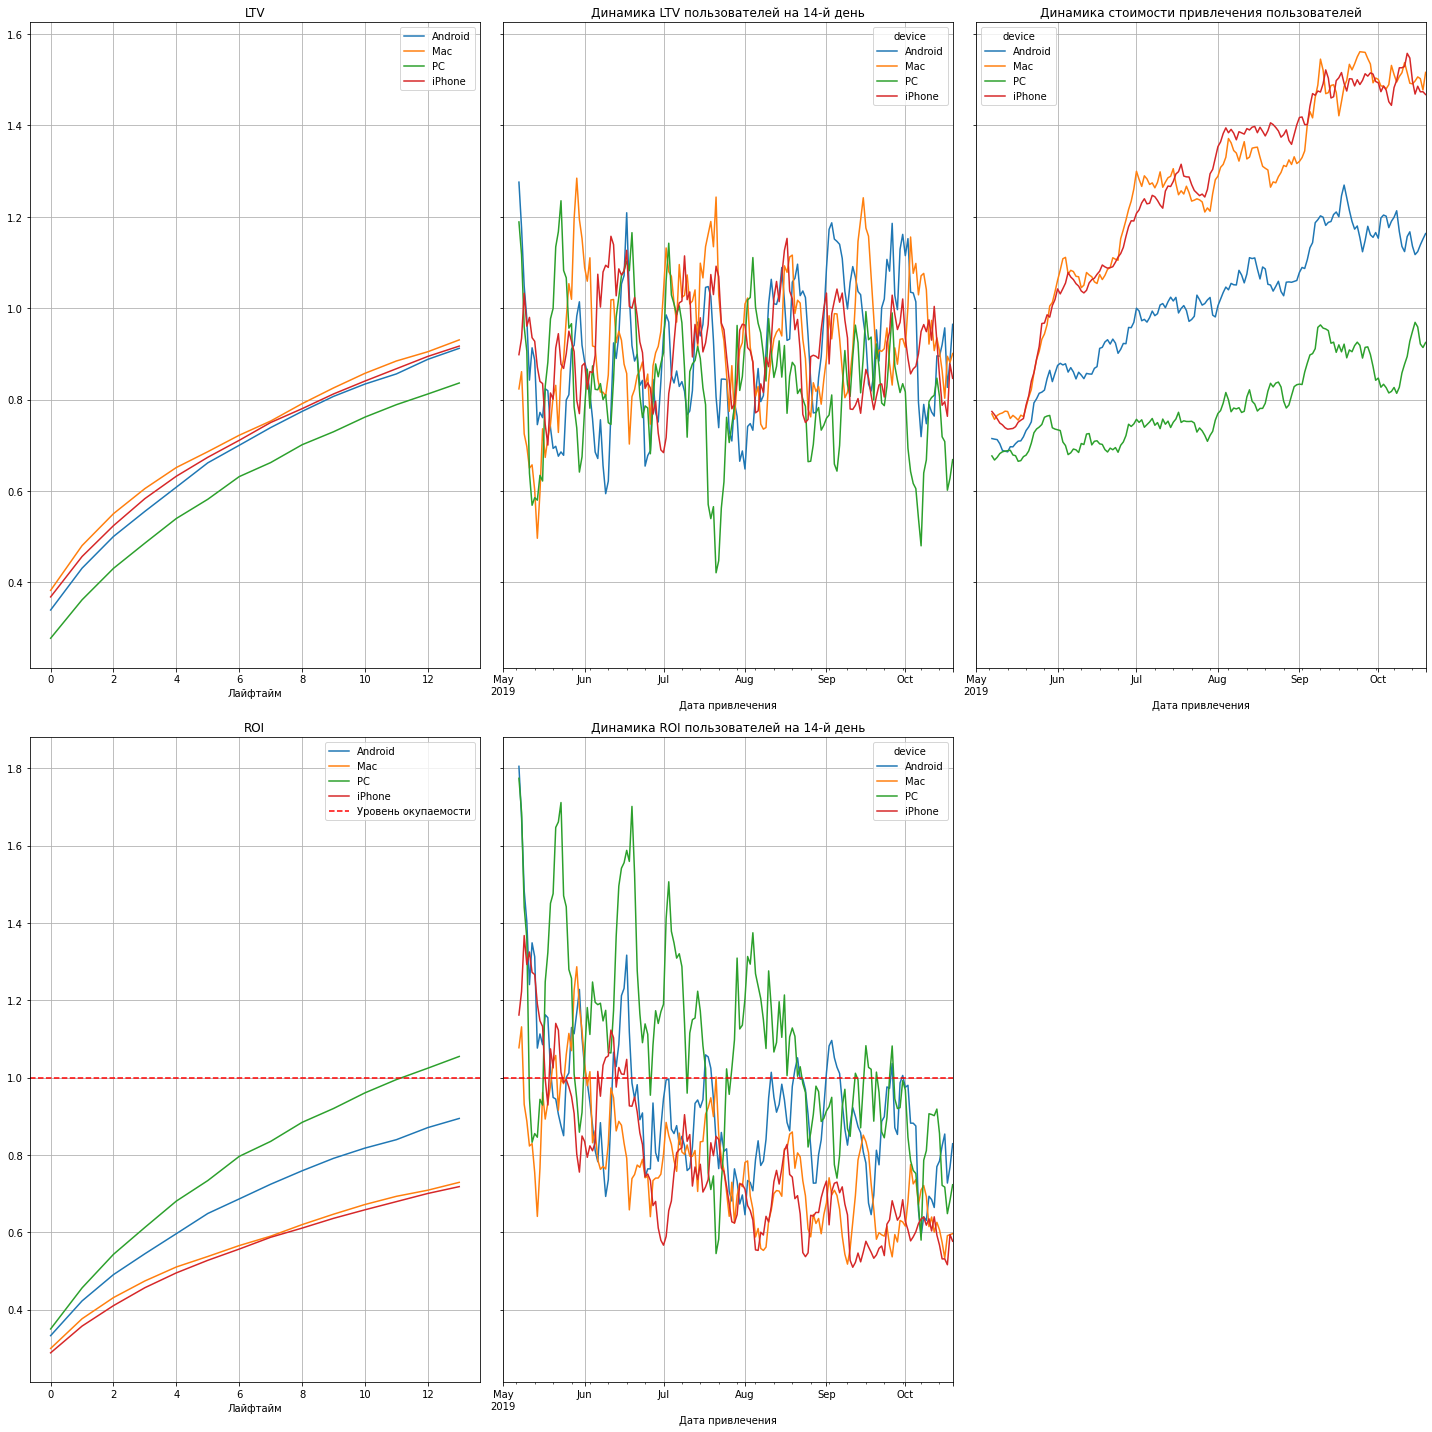

In [41]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=7)

Судя по данным графикам, окупаются лишь пользователи ПК! Наблюдается также общая тенденция на снижение ROI и увеличение CAC. LTV указывает на пользователей Mac и iPhone как самых платящих, однако, судя по ROI, они все равно не окупаются.

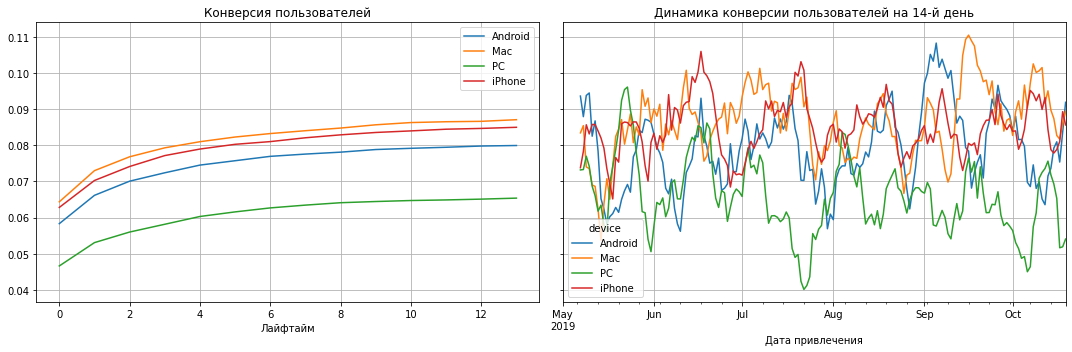

In [42]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, 
                                                                orders, 
                                                                observation_date, 
                                                                analysis_horizon,
                                                                dimensions=['device']
                                                               )
plot_conversion(conversion, conversion_history, analysis_horizon, window=7)

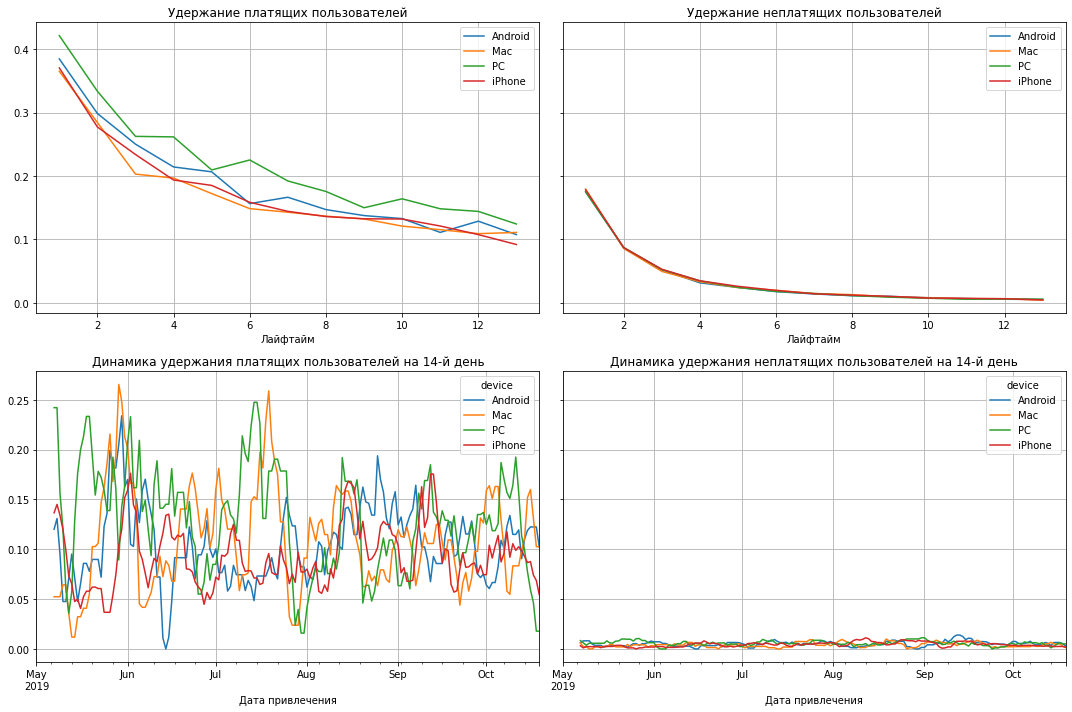

In [43]:
retention_raw, retention, retention_history = get_retention(profiles, 
                                                            visits, 
                                                            observation_date, 
                                                            analysis_horizon,
                                                            dimensions=['device']
                                                           )
plot_retention(retention, retention_history, analysis_horizon, window=7)

У ПК самое высокое удержание, но самый низкий показатель конверсии.

#### Показатели с разбивкой по странам

In [44]:
ltv_raw, ltv, ltv_history, roi, roi_history =  get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=['region'])

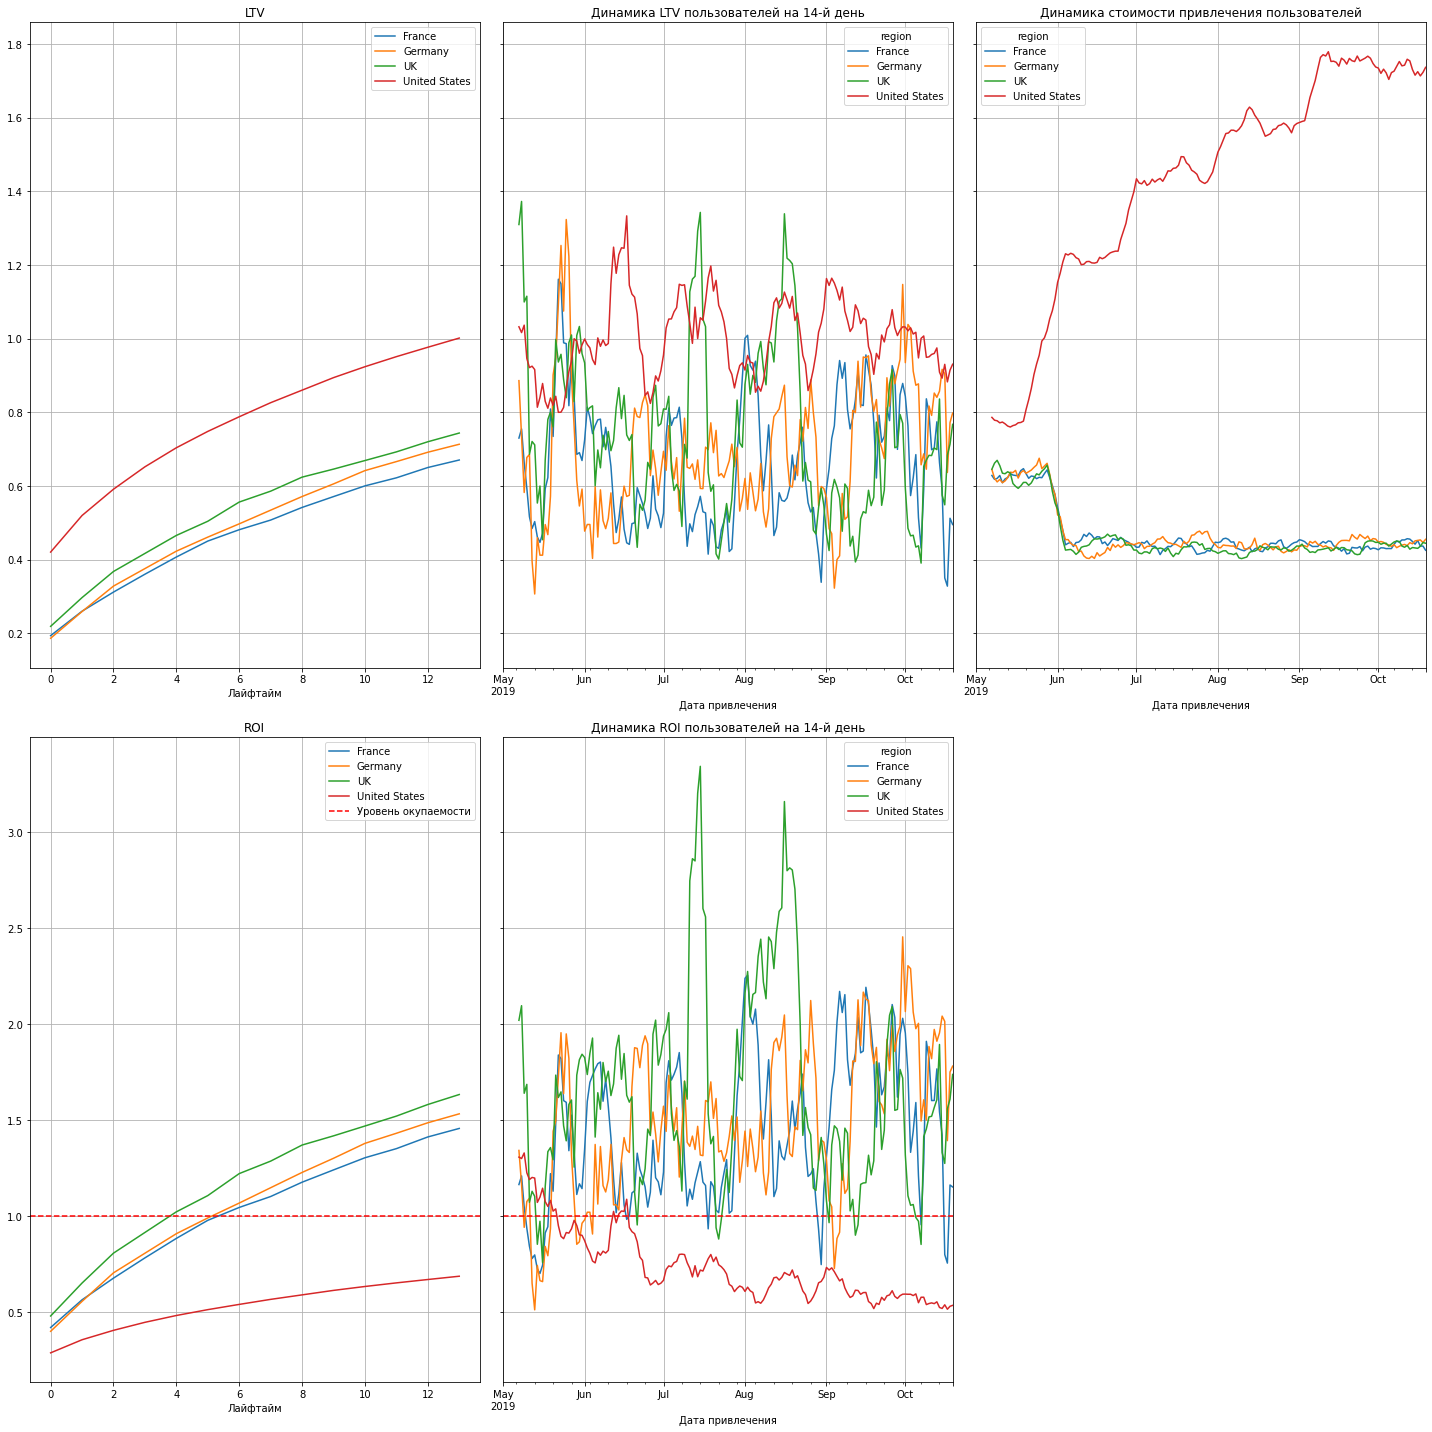

In [45]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=7)

В случае рассмотрения показателей по странам, LTV снова обманчиво указывает на США как самую платящую (по пользователям) страну, однако CAC указывает нам на то, что лишь в США цена пользователя стремительно растет, в отличие от других стран. В итоге, судя по ROI, окупаются пользоваели привлеченные из всех стран, кроме США.

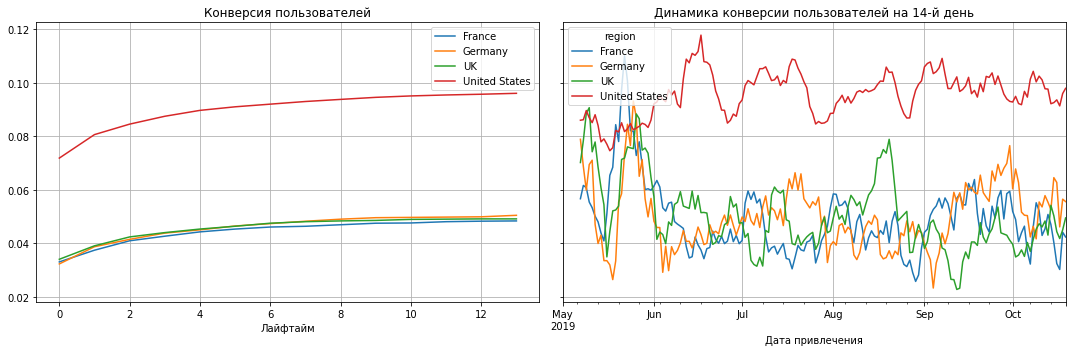

In [46]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, 
                                                                orders, 
                                                                observation_date, 
                                                                analysis_horizon,
                                                                dimensions=['region']
                                                               )
plot_conversion(conversion, conversion_history, analysis_horizon, window=7)

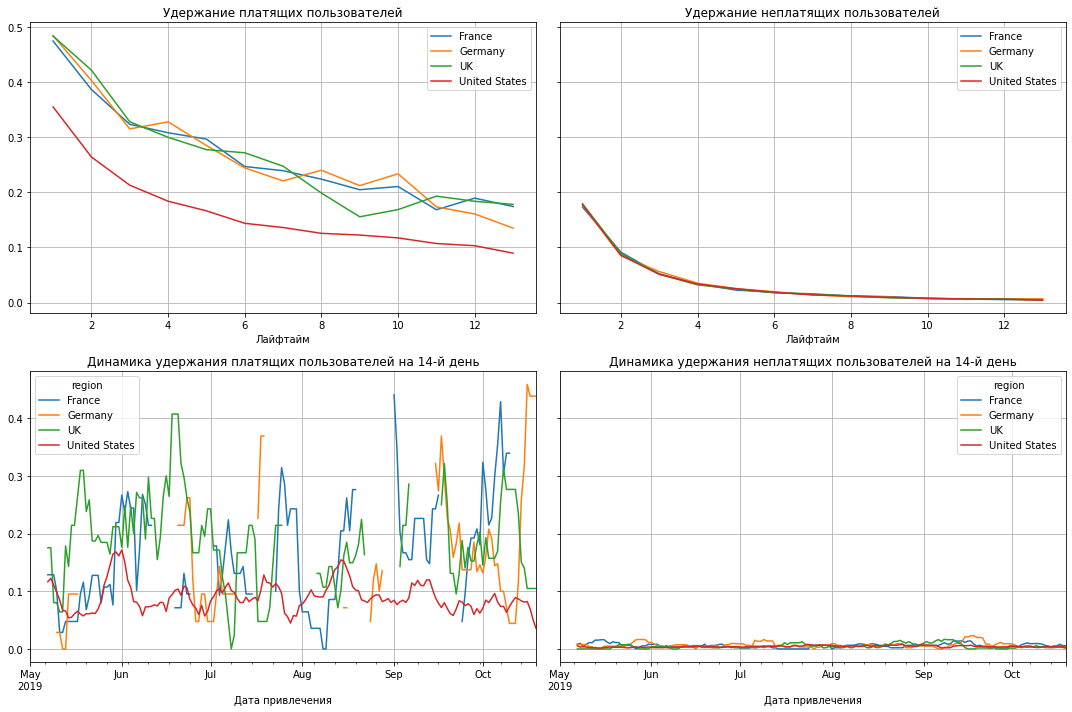

In [47]:
retention_raw, retention, retention_history = get_retention(profiles, 
                                                            visits, 
                                                            observation_date, 
                                                            analysis_horizon,
                                                            dimensions=['region']
                                                           )
plot_retention(retention, retention_history, analysis_horizon, window=7)

По США наблюдается самая высокая конверсия, но самое низкое удержание пользователей и самый высокий показатель CAC.

#### Показатели с разбивкой по рекламным каналам

In [48]:
ltv_raw, ltv, ltv_history, roi, roi_history =  get_ltv(profiles, orders, observation_date, analysis_horizon, dimensions=['channel'])

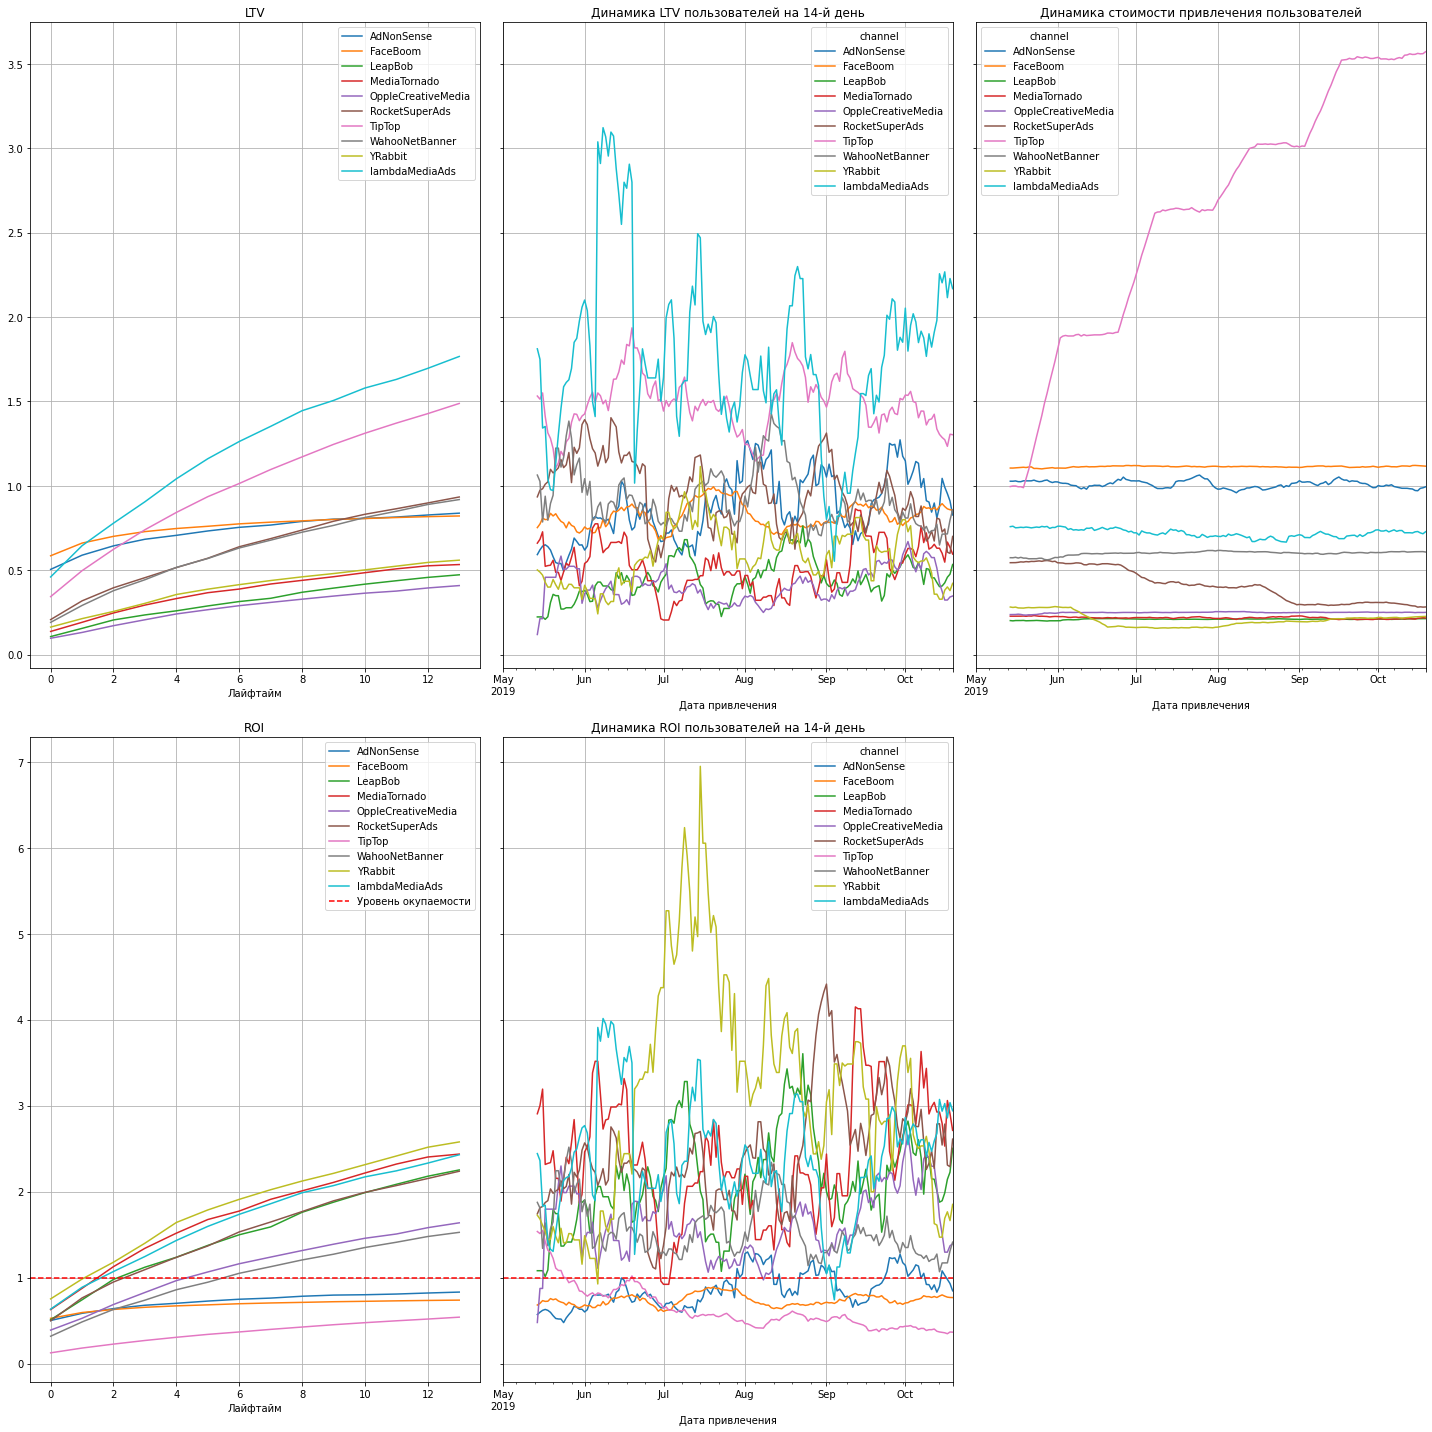

In [49]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon, window=14)

По показателям LTV можно сказать, что больше всего суммарно совершают покупки пользователи, привлеченные в LambdaMediaAds, TipTop и RocketSuperAds

Глядя на ROI, можно сказать, что три рекламных канала не окупают маркетинговые инвестиции, а именно: FaceBoom, TipTop и AdNonSense. TipTop, будучи самым дорогим рекламным каналом, имеет худшие показатели ROI. Лучшие же по ROI каналы - YRabbit и MediaTornado.

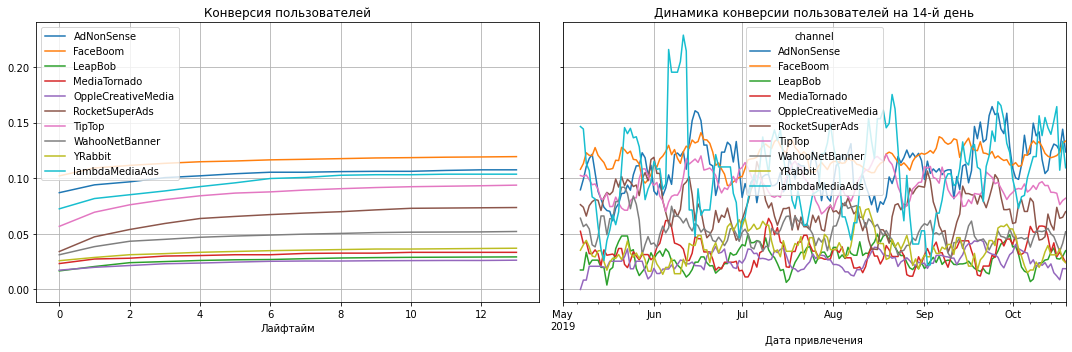

In [50]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, 
                                                                orders, 
                                                                observation_date, 
                                                                analysis_horizon,
                                                                dimensions=['channel']
                                                               )
plot_conversion(conversion, conversion_history, analysis_horizon, window=7)

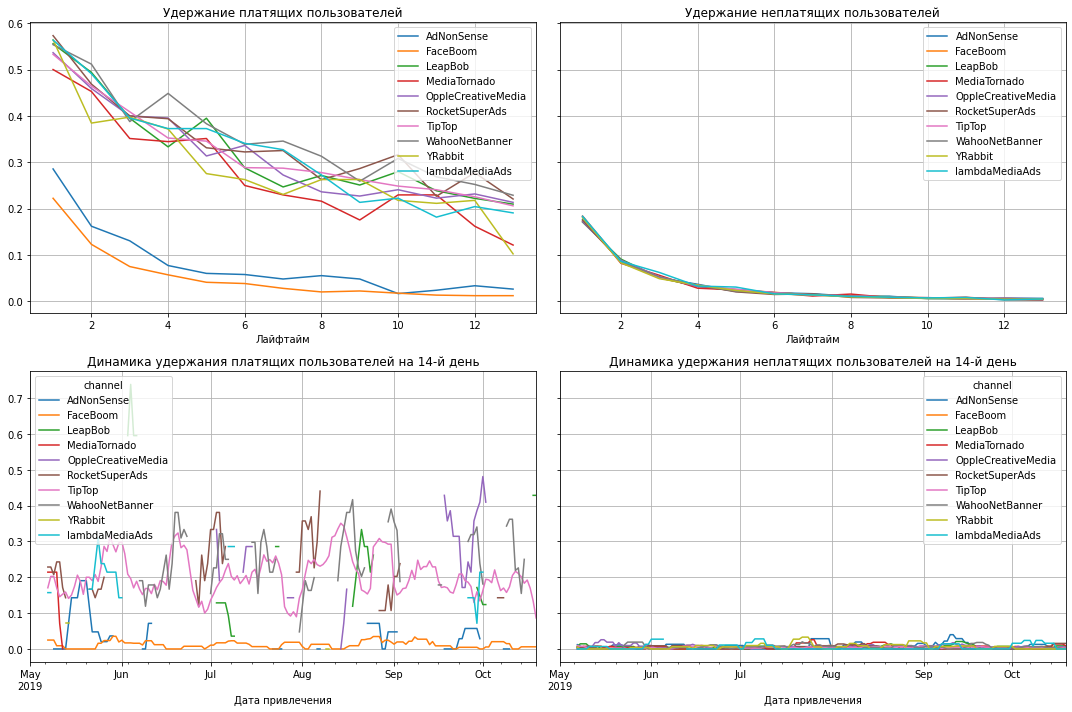

In [51]:
retention_raw, retention, retention_history = get_retention(profiles, 
                                                            visits, 
                                                            observation_date, 
                                                            analysis_horizon,
                                                            dimensions=['channel']
                                                           )
plot_retention(retention, retention_history, analysis_horizon, window=7)

Судя по графикам, у каналов AdNonSense и FaceBoom самое низкое удержание, несмотря на самую высокую конверсию.

**Промежуточный вывод:**
- судя по показателям, **реклама**, направленная на привлечение пользователей **в целом НЕ окупается**;
- судя по ROI **среди устройств окупаются лишь пользователи ПК**, среди стран **не окупается только США**, а среди рекламных каналов **не окупаются FaceBoom, TipTop и AdNonSense**;
- проблемы окупаемости могут быть вызваны тем, что:
    - у каналов AdNonSense и FaceBoom самое низкое удержание, несмотря на самую высокую конверсию, а показаьели CAC для TipTop значительно выше других;
    - у пользователей из США самая высокая конверсия и CAC, однако самое низкое удержание;
    - у пользователей iPhone и Mac самая высокая конверсия и CAC, однако самое низкое удержание.

### Выводы

Исследование показало, что маркетинговые вложения в привлечение пользователей **не окупаются**. 

Среди возможных причин - повышенные ставки на **дорогие рекламные каналы с низкой эффективностью**, повышенные ставки на **убыточные регионы** (а именно - США) и повышенные ставки на **убыточные устройства**, сперва кажущиеся доходными (iPhone, Android, Mac).

Отделу маркетинга можно порекомендовать несколько **скорректировать рекламную стратегию**, а именно:
- делать акцент на привлечении пользователей ПК, Android;
- отказаться от крупных рекламных кампаний с целью привлечения пользователей из США(!) и сделать акцент на привлечении пользователей из Великобритании;
- отказаться от слишком дорогих каналов рекламы (например, TipTop) и обратить внимание на такие каналы, как YRabbit и MediaTornado.


Исследование показало, что суммарные расходы на рекламу составили 105497 денежных единиц, тройка лидеров по рекламным вложениям - TipTop, FaceBoom и WahooNetBanner.
В процентном соотношении - 51,9%, 30,7%, 4,88% соответственно, то есть, TipTop и FaceBoom забирают больше 80% рекламного бюджета.
Средний CAC по всем каналам - 1,12. Среднее значение CAC превышает только CAC канала TipTop.

Также в ходе анализа показателей выяснилось, что маркетинговые вложения в привлечение пользователей **не окупаются**. 

**Причины** плохой окупаемости рекламных вложений:
- у каналов AdNonSense и FaceBoom самое низкое удержание, несмотря на самую высокую конверсию, а показатель CAC для TipTop значительно выше других;
- у пользователей из США самая высокая конверсия и CAC, однако самое низкое удержание;
- у пользователей iPhone и Mac самая высокая конверсия и CAC, однако самое низкое удержание.

**Рекомендуемые каналы привлечения** (окупающиеся, с хорошими показателями конверсии и удержания):
- LambdaMediaAds;
- RocketSuperAds;
- WahooNetBanner.